In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/Reddit_Data.csv')

In [ ]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df['category'].unique()

array([ 1, -1,  0])

In [ ]:
df['category'].isna().sum()

np.int64(0)

In [ ]:
df['category'].dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(449)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36800 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  36799 non-null  object
 1   category       36800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 862.5+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

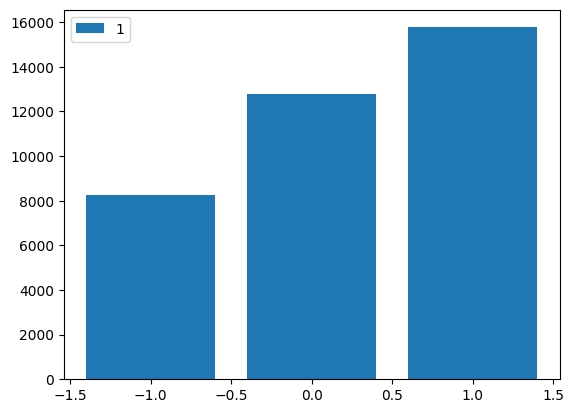

In [ ]:
plt.bar(df['category'].value_counts().index,df['category'].value_counts())
plt.legend(df['category'].unique())
plt.show()

/tmp/ipython-input-735855469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='category', data=df,palette="viridis")


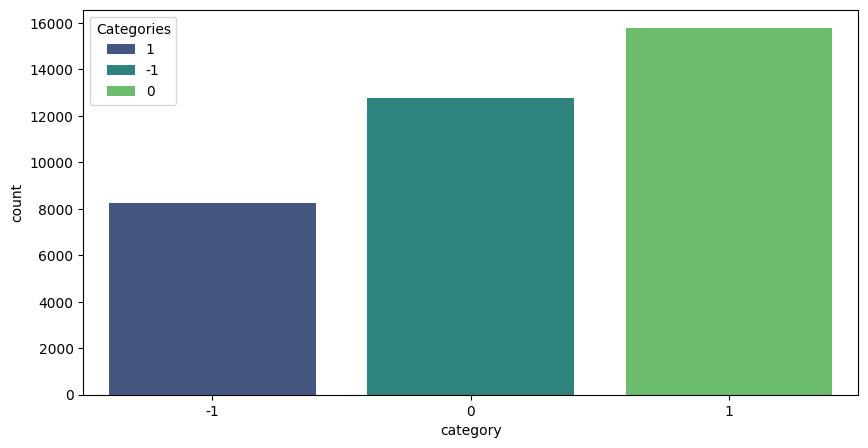

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='category', data=df,palette="viridis")

handles = ax.patches
labels = df['category'].unique()

plt.legend(handles, labels, title="Categories")
plt.show()



In [ ]:
df.isnull().sum()

,0
clean_comment,1
category,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
clean_comment,0
category,0


In [ ]:
df['clean_comment'].apply(lambda x : x.lower())
df['clean_comment'].apply(lambda x : x.replace('\n',' '))
df['clean_comment'].apply(lambda x : x.replace('\t',' '))
df['clean_comment'].apply(lambda x : x.strip())

,clean_comment
0,family mormon have never tried explain them th...
1,buddhism has very much lot compatible with chr...
2,seriously don say thing first all they won get...
3,what you have learned yours and only yours wha...
4,for your own benefit you may want read living ...
...,...
37244,jesus
37245,kya bhai pure saal chutiya banaya modi aur jab...
37246,downvote karna tha par upvote hogaya
37247,haha nice


In [ ]:
(df['category'].value_counts()*100/df['category'].value_counts().sum()).round(2)

,count
category,
1,42.86
0,34.72
-1,22.42


In [ ]:
df['len_token']=df['clean_comment'].apply(lambda x : len(x.split()))

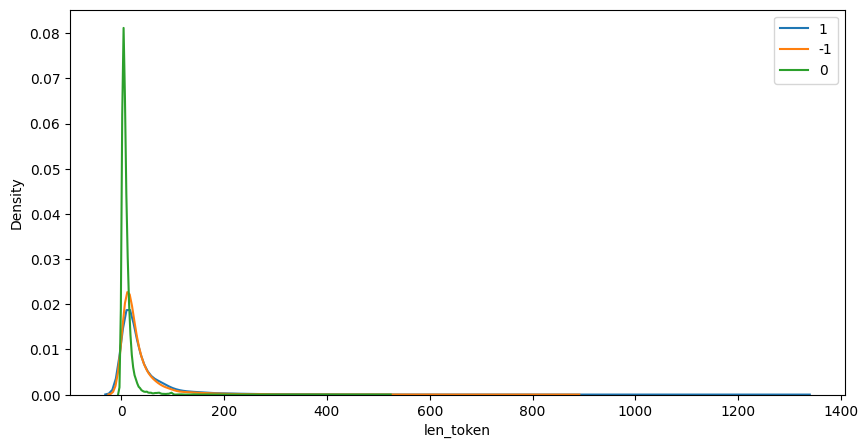

In [ ]:
plt.figure(figsize=(10,5))

for cat in df['category'].unique():
    sns.kdeplot(df[df['category'] == cat]['len_token'], label=cat)

plt.legend()
plt.show()

In [ ]:
df['clean_comment'].apply(lambda x : x.endswith(' ') or x.startswith(' ')).sum()

np.int64(32271)

In [ ]:
df['clean_comment'].str.strip()

,clean_comment
0,family mormon have never tried explain them th...
1,buddhism has very much lot compatible with chr...
2,seriously don say thing first all they won get...
3,what you have learned yours and only yours wha...
4,for your own benefit you may want read living ...
...,...
37244,jesus
37245,kya bhai pure saal chutiya banaya modi aur jab...
37246,downvote karna tha par upvote hogaya
37247,haha nice


In [ ]:
df['clean_comment'].apply(lambda x : x.endswith(' ') or x.startswith(' ')).sum()

np.int64(32271)

In [ ]:
#Libraries of NLTK
import re,string,nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [ ]:
#cleaning the data from unnecessary data

#replacing url with string URL
def replace_url(text):
    return re.sub('https?:\/\/\S*|www\.\S+','URL',text)

#removing html
def remove_html(text):
    return re.sub('<.*?>','',text)

#replacing mentions with string user
def replace_mentions(text):
    return re.sub('@\S*','user',text,flags=re.IGNORECASE)

#replacing numbers with string number
def replace_num(text):
    return re.sub('^[+-]*?\d{1,3}[- ]*?\d{1,10}|\d{10}','NUMBER',text)

#replacing <3 with sring heart
def replace_heart(text):
    return re.sub('<3','HEART', text)

#removing alphanumeric characters eg-XYZ123ABC
def remove_alphanumeric(text):
    return re.sub('\w*\d+\w*','',text)

#removing all english stopwords
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

#removing punctuations
def remove_punctuations(text):
    text=''.join([word for word in text if word not in string.punctuation])
    return text

#reducing words to thier root form
def lemmatization(text):
    lm= WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])
    return text

<>:5: SyntaxWarning: invalid escape sequence '\/'
<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\/'
<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-3166861895.py:5: SyntaxWarning: invalid escape sequence '\/'
  return re.sub('https?:\/\/\S*|www\.\S+','URL',text)
/tmp/ipython-input-3166861895.py:13: SyntaxWarning: invalid escape sequence '\S'
  return re.sub('@\S*','user',text,flags=re.IGNORECASE)
/tmp/ipython-input-3166861895.py:17: SyntaxWarning: invalid escape sequence '\d'
  return re.sub('^[+-]*?\d{1,3}[- ]*?\d{1,10}|\d{10}','NUMBER',text)
/tmp/ipython-input-3166861895.py:25: SyntaxWarning: invalid escape sequence '\w'
  return re.sub('\w*\d+\w*','',text)


In [ ]:
def clean_text(text):
    text=str(text).lower()
    text = replace_url(text)
    text = remove_html(text)
    text = replace_mentions(text)
    text = replace_num(text)
    text = replace_heart(text)
    text = remove_alphanumeric(text)
    text = remove_stopwords(text)
    text=remove_punctuations(text)
    #text=stemming(text)
    text=lemmatization(text)
    return text

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
x=stopwords.words("english")
y=string.punctuation

In [ ]:
print(x)
print(y)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
df['word_count']=df['clean_comment'].apply(lambda x : len(x.split()))

In [ ]:
df.head(5)

,clean_comment,category,len_token,word_count
0,family mormon have never tried explain them t...,1,39,39
1,buddhism has very much lot compatible with chr...,1,196,196
2,seriously don say thing first all they won get...,-1,86,86
3,what you have learned yours and only yours wha...,0,29,29
4,for your own benefit you may want read living ...,1,112,112


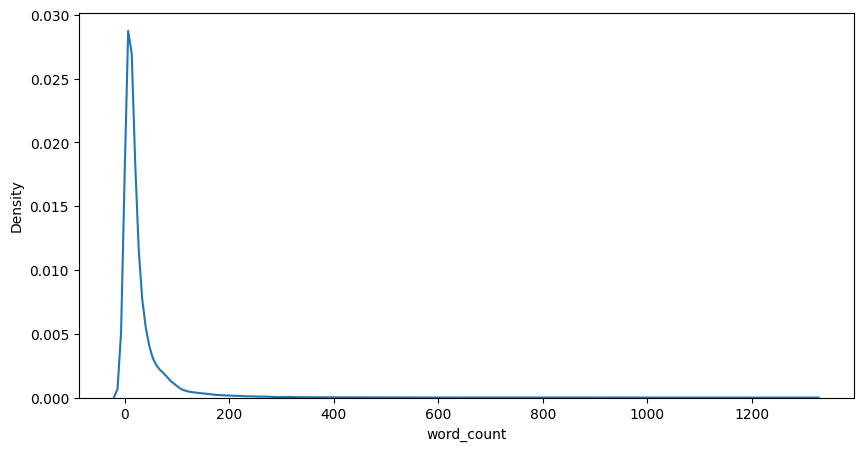

In [ ]:
plt.figure(figsize=(10,5))

sns.kdeplot(df['word_count'])
plt.show()

/tmp/ipython-input-3463290956.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['word_count'])


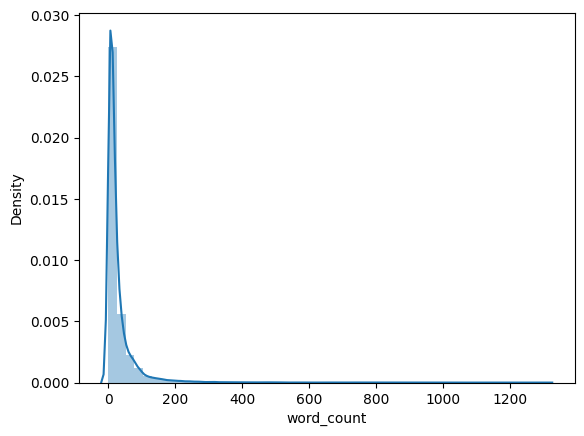

In [ ]:
sns.distplot(df['word_count'])
plt.show()

In [ ]:
df['word_count'].describe()

,word_count
count,36799.000000
mean,29.662627
std,56.787371
min,0.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


In [ ]:
df['token']=df['clean_comment'].apply(lambda x : x.split())

In [ ]:
df['sw']=df['clean_comment'].apply(lambda x : len([word for word in x.split() if word in stopwords.words('english')]))

In [ ]:
sw_list=stopwords.words('english')


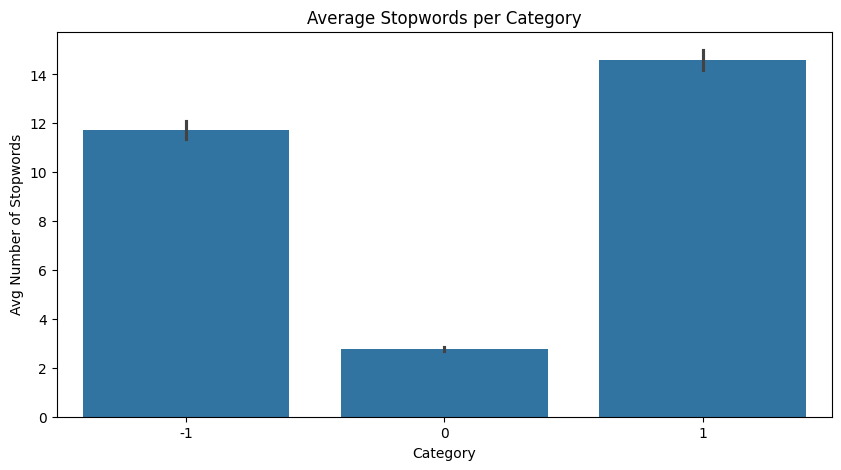

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=df,
    x='category',
    y='sw',
    estimator='mean'
)
plt.xlabel('Category')
plt.ylabel('Avg Number of Stopwords')
plt.title('Average Stopwords per Category')
plt.show()


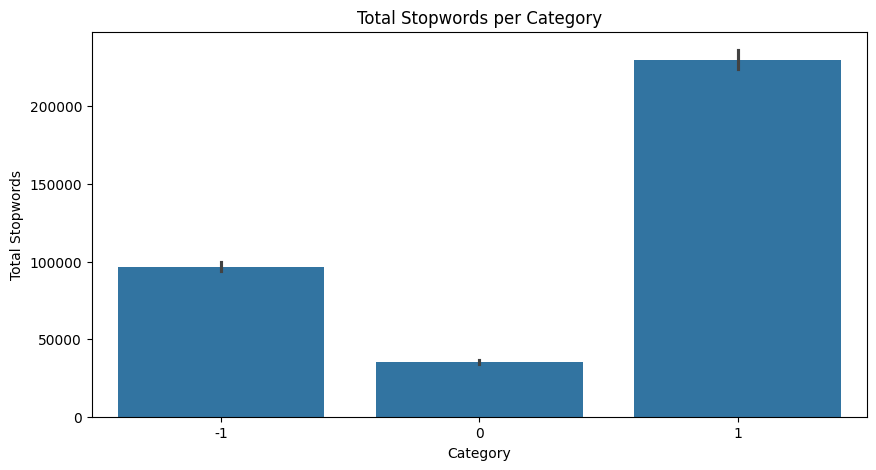

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=df,
    x='category',
    y='sw',
    estimator='sum'
)
plt.xlabel('Category')
plt.ylabel('Total Stopwords')
plt.title('Total Stopwords per Category')
plt.show()


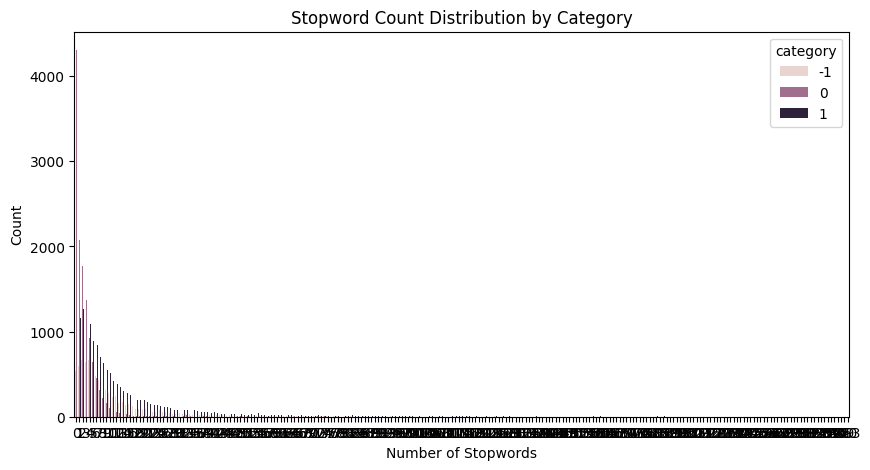

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='sw', hue='category')
plt.xlabel('Number of Stopwords')
plt.ylabel('Count')
plt.title('Stopword Count Distribution by Category')
plt.show()


In [ ]:
df['clean_comment']=df['clean_comment'].apply(lambda x : clean_text(x))

In [ ]:
df.to_csv('cleaned_data.csv',index=False)

Base model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:

max_features_list=[1000,2000,3000,4000]
ngram=[(1,1),(1,2),(1,3)]

In [ ]:
vectorize_list=['tf-idf','count']

In [ ]:
df=pd.read_csv('/content/cleaned_data.csv')
X=df['clean_comment']
y=df['category']


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
model_list=[]
#TF-IDF
for max_features in max_features_list:
  for n in ngram:
    for vectorize in vectorize_list:
      print(f"Max Features: {max_features}, N-gram: {n}, Vectorize: {vectorize}")
      # Re-read X inside the loop to ensure X is not already transformed from a previous iteration
      # Also, handle potential NaN values by filling them with an empty string
      X_current = df['clean_comment'].fillna('')

      if vectorize=='tf-idf':
        vc=TfidfVectorizer(max_features=max_features,ngram_range=n)
      else:
        vc=CountVectorizer(max_features=max_features,ngram_range=n)

      X_transformed=vc.fit_transform(X_current)
      y=df['category']
      xtr,xts,ytr,yts=train_test_split(X_transformed,y,test_size=0.2,random_state=42)
      rf=RandomForestClassifier(
          n_estimators=100,
          max_depth=5,
          random_state=42
      )
      rf.fit(xtr,ytr)
      ypred=rf.predict(xts)
      acc_score=accuracy_score(yts,ypred)
      clf_report=classification_report(yts,ypred)
      print(f"Accuracy: {acc_score}")
      print(f"Classification Report:\n{clf_report}")


Max Features: 1000, N-gram: (1, 1), Vectorize: tf-idf


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6061141304347826
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.68      0.66      0.67      2509
           1       0.57      0.88      0.69      3200

    accuracy                           0.61      7360
   macro avg       0.42      0.51      0.45      7360
weighted avg       0.48      0.61      0.53      7360

Max Features: 1000, N-gram: (1, 1), Vectorize: count


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6063858695652173
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.68      0.67      0.67      2509
           1       0.57      0.87      0.69      3200

    accuracy                           0.61      7360
   macro avg       0.42      0.51      0.45      7360
weighted avg       0.48      0.61      0.53      7360

Max Features: 1000, N-gram: (1, 2), Vectorize: tf-idf
Accuracy: 0.6052989130434783
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.01      0.02      1651
           0       0.69      0.65      0.67      2509
           1       0.56      0.88      0.69      3200

    accuracy                           0.61      7360
   macro avg       0.75      0.51      0.46      7360
weighted avg       0.70      0.61      0.53      7360

Max Features: 1000, N-gram: (1, 2), Vectorize: count
Accuracy: 0.605027173913043

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5725543478260869
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.77      0.49      0.60      2509
           1       0.52      0.93      0.67      3200

    accuracy                           0.57      7360
   macro avg       0.43      0.47      0.42      7360
weighted avg       0.49      0.57      0.49      7360

Max Features: 2000, N-gram: (1, 1), Vectorize: count


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5807065217391304
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.78      0.51      0.62      2509
           1       0.52      0.93      0.67      3200

    accuracy                           0.58      7360
   macro avg       0.43      0.48      0.43      7360
weighted avg       0.49      0.58      0.50      7360

Max Features: 2000, N-gram: (1, 2), Vectorize: tf-idf
Accuracy: 0.5820652173913043
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.00      0.00      1651
           0       0.77      0.51      0.61      2509
           1       0.53      0.94      0.68      3200

    accuracy                           0.58      7360
   macro avg       0.77      0.48      0.43      7360
weighted avg       0.72      0.58      0.50      7360

Max Features: 2000, N-gram: (1, 2), Vectorize: count


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5872282608695653
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.76      0.53      0.62      2509
           1       0.53      0.93      0.68      3200

    accuracy                           0.59      7360
   macro avg       0.43      0.49      0.43      7360
weighted avg       0.49      0.59      0.51      7360

Max Features: 2000, N-gram: (1, 3), Vectorize: tf-idf


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.580570652173913
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.77      0.51      0.61      2509
           1       0.53      0.94      0.67      3200

    accuracy                           0.58      7360
   macro avg       0.43      0.48      0.43      7360
weighted avg       0.49      0.58      0.50      7360

Max Features: 2000, N-gram: (1, 3), Vectorize: count


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5846467391304347
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.76      0.53      0.62      2509
           1       0.53      0.93      0.68      3200

    accuracy                           0.58      7360
   macro avg       0.43      0.49      0.43      7360
weighted avg       0.49      0.58      0.51      7360

Max Features: 3000, N-gram: (1, 1), Vectorize: tf-idf


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.44864130434782606
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.86      0.04      0.08      2509
           1       0.44      1.00      0.61      3200

    accuracy                           0.45      7360
   macro avg       0.44      0.35      0.23      7360
weighted avg       0.49      0.45      0.29      7360

Max Features: 3000, N-gram: (1, 1), Vectorize: count


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.575679347826087
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.80      0.49      0.60      2509
           1       0.52      0.94      0.67      3200

    accuracy                           0.58      7360
   macro avg       0.44      0.48      0.42      7360
weighted avg       0.50      0.58      0.50      7360

Max Features: 3000, N-gram: (1, 2), Vectorize: tf-idf


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.4502717391304348
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.87      0.05      0.09      2509
           1       0.44      1.00      0.61      3200

    accuracy                           0.45      7360
   macro avg       0.44      0.35      0.23      7360
weighted avg       0.49      0.45      0.30      7360

Max Features: 3000, N-gram: (1, 2), Vectorize: count


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5751358695652173
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.79      0.48      0.60      2509
           1       0.52      0.94      0.67      3200

    accuracy                           0.58      7360
   macro avg       0.44      0.48      0.42      7360
weighted avg       0.50      0.58      0.50      7360

Max Features: 3000, N-gram: (1, 3), Vectorize: tf-idf


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.4452445652173913
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.89      0.03      0.06      2509
           1       0.44      1.00      0.61      3200

    accuracy                           0.45      7360
   macro avg       0.44      0.34      0.22      7360
weighted avg       0.49      0.45      0.29      7360

Max Features: 3000, N-gram: (1, 3), Vectorize: count


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.43505434782608693
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.75      0.00      0.00      2509
           1       0.43      1.00      0.61      3200

    accuracy                           0.44      7360
   macro avg       0.39      0.33      0.20      7360
weighted avg       0.44      0.44      0.26      7360

Max Features: 4000, N-gram: (1, 1), Vectorize: tf-idf


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.4423913043478261
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.92      0.02      0.05      2509
           1       0.44      1.00      0.61      3200

    accuracy                           0.44      7360
   macro avg       0.45      0.34      0.22      7360
weighted avg       0.50      0.44      0.28      7360

Max Features: 4000, N-gram: (1, 1), Vectorize: count


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.44279891304347824
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.91      0.02      0.05      2509
           1       0.44      1.00      0.61      3200

    accuracy                           0.44      7360
   macro avg       0.45      0.34      0.22      7360
weighted avg       0.50      0.44      0.28      7360

Max Features: 4000, N-gram: (1, 2), Vectorize: tf-idf


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.4483695652173913
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.90      0.04      0.08      2509
           1       0.44      1.00      0.61      3200

    accuracy                           0.45      7360
   macro avg       0.45      0.35      0.23      7360
weighted avg       0.50      0.45      0.29      7360

Max Features: 4000, N-gram: (1, 2), Vectorize: count


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.43478260869565216
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.00      0.00      0.00      2509
           1       0.43      1.00      0.61      3200

    accuracy                           0.43      7360
   macro avg       0.14      0.33      0.20      7360
weighted avg       0.19      0.43      0.26      7360

Max Features: 4000, N-gram: (1, 3), Vectorize: tf-idf


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.44578804347826084
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.89      0.03      0.06      2509
           1       0.44      1.00      0.61      3200

    accuracy                           0.45      7360
   macro avg       0.44      0.34      0.23      7360
weighted avg       0.50      0.45      0.29      7360

Max Features: 4000, N-gram: (1, 3), Vectorize: count
Accuracy: 0.44157608695652173
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1651
           0       0.90      0.02      0.04      2509
           1       0.44      1.00      0.61      3200

    accuracy                           0.44      7360
   macro avg       0.45      0.34      0.22      7360
weighted avg       0.50      0.44      0.28      7360



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
